# TensorFlow Regression Example

## Creating Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 1 Million Points
x_data = np.linspace(0.0,10.0,1000000)

In [5]:
noise = np.random.randn(len(x_data))

In [6]:
# y = mx + b + noise_levels
b = 5

y_true =  (0.5 * x_data ) + 5 + noise

In [7]:
my_data = pd.concat([pd.DataFrame(data=x_data,columns=['X Data']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)

In [8]:
my_data.head()

,X Data,Y
0,0.00000,5.732256
1,0.00001,4.885886
2,0.00002,5.535855
3,0.00003,4.212651
4,0.00004,4.765641


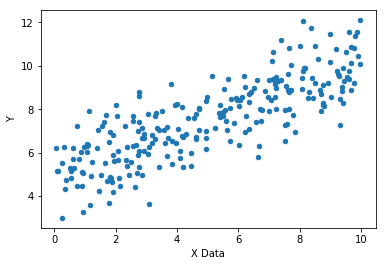

In [9]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

# TensorFlow
## Batch Size

We will take the data in batches (1,000,000 points is a lot to pass in at once)

In [10]:
import tensorflow as tf

In [11]:
# Random 10 points to grab
batch_size = 8

** Variables **

In [12]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

** Placeholders **

In [13]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

** Graph **

In [14]:
y_model = m*xph + b

** Loss Function **

In [15]:
error = tf.reduce_sum(tf.square(yph-y_model))

** Optimizer **

In [16]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

** Initialize Variables **

In [17]:
init = tf.global_variables_initializer()

### Session

In [18]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    model_m,model_b = sess.run([m,b])

In [19]:
model_m

0.56747735

In [20]:
model_b

4.939178

### Results

In [21]:
y_hat = x_data * model_m + model_b

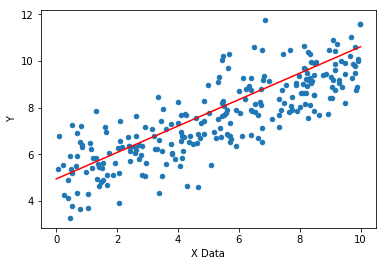

In [22]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

## tf.estimator API

Much simpler API for basic tasks like regression! We'll talk about more abstractions like TF-Slim later on.

In [40]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [41]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/sr/9k0jqkfs33q22ppyt_t7yjt9716826/T/tmph7e5lkwm', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a2eabef60>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Train Test Split

We haven't actually performed a train test split yet! So let's do that on our data now and perform a more realistic version of a Regression Task

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3, random_state = 101)

In [53]:
print(x_train.shape)
print(y_train.shape)

print(x_eval.shape)
print(y_eval.shape)

(700000,)
(700000,)
(300000,)
(300000,)


### Set up Estimator Inputs

In [54]:
# Can also do .pandas_input_fn
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None,shuffle=True)

In [46]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000,shuffle=False)

In [47]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=4,num_epochs=1000,shuffle=False)

### Train the Estimator

In [55]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/sr/9k0jqkfs33q22ppyt_t7yjt9716826/T/tmpeonfvw4m/model.ckpt.
INFO:tensorflow:loss = 209.925, step = 1
INFO:tensorflow:global_step/sec: 1387.94
INFO:tensorflow:loss = 38.6591, step = 101 (0.074 sec)
INFO:tensorflow:global_step/sec: 1742.62
INFO:tensorflow:loss = 15.0823, step = 201 (0.058 sec)
INFO:tensorflow:global_step/sec: 1474.53
INFO:tensorflow:loss = 2.12803, step = 301 (0.068 sec)
INFO:tensorflow:global_step/sec: 1550.77
INFO:tensorflow:loss = 20.0916, step = 401 (0.064 sec)
INFO:tensorflow:global_step/sec: 1469.34
INFO:tensorflow:loss = 15.3533, step = 501 (0.068 sec)
INFO:tensorflow:global_step/sec: 1361.21
INFO:tensorflow:loss = 1.59315, step = 601 (0.072 sec)
INFO:tensorflow:global_step/sec: 1421.79
INFO:tensorflow:loss = 6.87196, step = 701 (0.070 sec)
INFO:tensorflow:global_step/sec: 1488.96
INFO:tensorflow:loss = 1.91206, step = 801 (0.067 sec)
INFO:tensorflow:global_step/

### Evaluation

In [32]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-02-26-00:04:41
INFO:tensorflow:Restoring parameters from /var/folders/sr/9k0jqkfs33q22ppyt_t7yjt9716826/T/tmpak0qgdo3/model.ckpt-1000
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-02-26-00:04:42
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.07891, global_step = 1000, loss = 4.31565


In [33]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-02-26-00:04:42
INFO:tensorflow:Restoring parameters from /var/folders/sr/9k0jqkfs33q22ppyt_t7yjt9716826/T/tmpak0qgdo3/model.ckpt-1000
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-02-26-00:04:43
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.09401, global_step = 1000, loss = 4.37604


In [34]:
print("train metrics: {}".format(train_metrics))
print("eval metrics: {}".format(eval_metrics))

train metrics: {'average_loss': 1.0789132, 'loss': 4.3156528, 'global_step': 1000}
eval metrics: {'average_loss': 1.09401, 'loss': 4.37604, 'global_step': 1000}


### Predictions

In [35]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)

In [36]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from /var/folders/sr/9k0jqkfs33q22ppyt_t7yjt9716826/T/tmpak0qgdo3/model.ckpt-1000


[{'predictions': array([ 4.29093885], dtype=float32)},
 {'predictions': array([ 4.96475935], dtype=float32)},
 {'predictions': array([ 5.63858032], dtype=float32)},
 {'predictions': array([ 6.31240082], dtype=float32)},
 {'predictions': array([ 6.98622131], dtype=float32)},
 {'predictions': array([ 7.66004181], dtype=float32)},
 {'predictions': array([ 8.3338623], dtype=float32)},
 {'predictions': array([ 9.0076828], dtype=float32)},
 {'predictions': array([ 9.68150425], dtype=float32)},
 {'predictions': array([ 10.35532475], dtype=float32)}]

In [37]:
predictions = []# np.array([])
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Restoring parameters from /var/folders/sr/9k0jqkfs33q22ppyt_t7yjt9716826/T/tmpak0qgdo3/model.ckpt-1000


In [38]:
predictions

[array([ 4.29093885], dtype=float32),
 array([ 4.96475935], dtype=float32),
 array([ 5.63858032], dtype=float32),
 array([ 6.31240082], dtype=float32),
 array([ 6.98622131], dtype=float32),
 array([ 7.66004181], dtype=float32),
 array([ 8.3338623], dtype=float32),
 array([ 9.0076828], dtype=float32),
 array([ 9.68150425], dtype=float32),
 array([ 10.35532475], dtype=float32)]

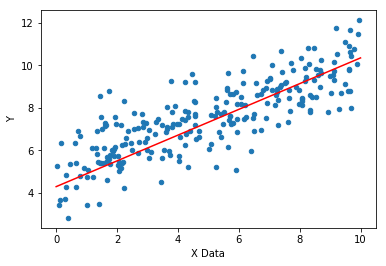

In [39]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(np.linspace(0,10,10),predictions,'r')

# Great Job!